## Copy it from ../compare_sigma_alphas_diff_Pspeczsys_photozerr0.05.ipynb, modify it to show the improvement on the constraint of $\sigma(D_A/r_d)$ from multi-tracer cases compared to that of the spec-z.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys
from pathlib import Path
import matplotlib as mpl

In [3]:
sys.path.append("/home/zjding/csst_bao/fisher_pkmu/")
from mcmc_funs import growth_factor
from astropy.table import Table

In [4]:
speed_c = 299792.458    # speed of light, km/s
Omega_m = 0.3075

##Pspeczsys_list = ["2.e2", "4.e2", "6.e2", "8.e2", "1.e3", "2.e3", "3.e3", "4.e3", "5.e3", "6.e3", "7.e3", "8.e3", "9.e3", "1.e4"]
Pspeczsys_list = ["1.0", "6.e2", "1.e3", "2.e3", "3.e3", "4.e3", "5.e3", "6.e3", "7.e3", "8.e3", "9.e3", "1.e4"]

survey_area = 17500.0
kmax = 0.3
kwidth = 0.005
zmin = 0.
zmax = 1.6
nzbins = 8
zbins = np.linspace(zmin, zmax, nzbins+1)

const_low = 0.99
const_up = 1.01

skyarea_total = 4*np.pi * (180./np.pi)**2.0
fsky = survey_area/skyarea_total
G_0 = growth_factor(0.0, Omega_m)       # G_0 at z=0, normalization factor 

# ## estimate the power spectrum damping parameter $\Sigma_{specz}$, $\Sigma_{pz}$ from the spec-z and photo-z uncertainty
sigma_specz = 0.002

sigma_photoz = 0.025

# Finger-of-God damping term
Sigma_fog = 7.0 

In [5]:
idir0 = "/home/zjding/csst_bao/fisher_pkmu/BAO_part/Fisher_sigma_alphas/numerical_method/default/output/"

In [6]:
# recon_dir_list = ["pre_recon", "post_recon"]
# text_list = ["Pre-recon", "Post-recon"]
# line_list = ['--', ':', '-.', '-']
# marker_list = ['x', 's', '>', 'o']
tracer_list = ['specz', 'specz_add_cross', 'specz_photoz_add_cross']
label_list = ['spec-z', 'spec-z + cross', 'spec-z + photo-z + cross']


if Sigma_fog > 0.0:
    ##params_str_list = ['11101010101010', '11110101010101', '11111111111111', '11111111111111']
    params_str_list = ['11110101010101', '11111111111111', '11111111111111']

In [7]:
recon_dir = "pre_recon"

sigalpha_perp_all_pre = []
sigalpha_para_all_pre = []

for Pspecz_sys in Pspeczsys_list:
    alpha_dir = idir0 + f"sigma_alpha/vary_params_{const_low}_{const_up}/Sigma_fog_{Sigma_fog}/{recon_dir}/k_width{kwidth}/Pspecz_sys{Pspecz_sys}/params_bf1.0/"
    alpha_perp_list = []
    alpha_para_list = []
    for tracer, params_str in zip(tracer_list, params_str_list):
        filename_specz = "sigma_alpha_{0}_tracer_zerror_specz{1:.3f}_photoz{2:.3f}_kmax{3:.2f}_params{4}.npz".format(tracer, sigma_specz, sigma_photoz, kmax, params_str)

        ifile = Path(alpha_dir, filename_specz)
        #print(ifile)
        data = np.load(ifile)
        alphas_mar = data['alphas_mar']

        alpha_perp_list.append(alphas_mar[:, 2])
        alpha_para_list.append(alphas_mar[:, 3])
    
    sigalpha_perp_all_pre.append(alpha_perp_list)
    sigalpha_para_all_pre.append(alpha_para_list)

In [8]:
# recon_dir = "post_recon"

# sigalpha_perp_all_post = []
# sigalpha_para_all_post = []

# for Pspecz_sys in Pspeczsys_list:
#     alpha_dir = idir0 + f"sigma_alpha/vary_params_{const_low}_{const_up}/Sigma_fog_{Sigma_fog}/{recon_dir}/k_width{kwidth}/Pspecz_sys{Pspecz_sys}/params_bf1.0/"
    
#     alpha_perp_list = []
#     alpha_para_list = []
#     for tracer, params_str in zip(tracer_list, params_str_list):
#         filename_specz = "sigma_alpha_{0}_tracer_zerror_specz{1:.3f}_photoz{2:.3f}_kmax{3:.2f}_params{4}.npz".format(tracer, sigma_specz, sigma_photoz, kmax, params_str)

#         ifile = Path(alpha_dir, filename_specz)
#         data = np.load(ifile)
#         alphas_mar = data['alphas_mar']

#         alpha_perp_list.append(alphas_mar[:, 2])
#         alpha_para_list.append(alphas_mar[:, 3])
    
#     sigalpha_perp_all_post.append(alpha_perp_list)
#     sigalpha_para_all_post.append(alpha_para_list)

In [8]:
alphas_mar

array([[ 0.        ,  0.2       ,  0.05994595,  0.2985629 , -0.27174573],
       [ 0.2       ,  0.4       ,  0.02297398,  0.11550658, -0.25043765],
       [ 0.4       ,  0.6       ,  0.01464479,  0.07407953, -0.23626307],
       [ 0.6       ,  0.8       ,  0.0108953 ,  0.05633834, -0.22954681],
       [ 0.8       ,  1.        ,  0.00897849,  0.04798963, -0.22191834],
       [ 1.        ,  1.2       ,  0.00820708,  0.05444509, -0.19635989],
       [ 1.2       ,  1.4       ,  0.00817839,  0.11220393, -0.19179879],
       [ 1.4       ,  1.6       ,  0.00814189,  0.24610432, -0.30719976]])

In [9]:
z_mid = (alphas_mar[:, 0] + alphas_mar[:, 1])/2.0
z_mid

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

In [10]:
odir = "./figs/z{0:.1f}_{1:.1f}_{2}zbins/".format(zmin, zmax, nzbins)
if not os.path.exists(odir):
    os.makedirs(odir)

## for the improvement of $\sigma (\alpha_{\perp})$ from spec-z+cross relative to spec-z only

<Figure size 432x288 with 0 Axes>

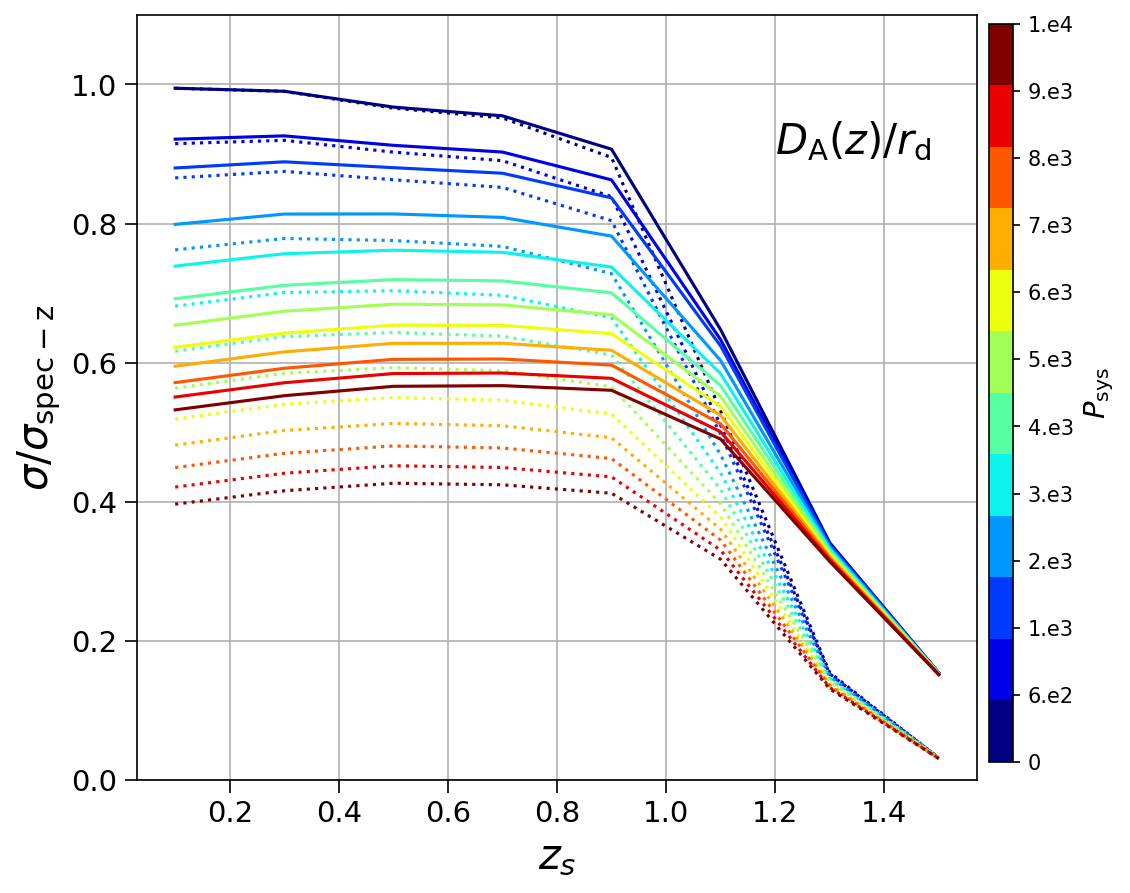

In [11]:
plt.clf()
# colormap
cmap = plt.get_cmap('jet', len(Pspeczsys_list))

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=150, sharey=True)
plt.subplots_adjust(
    left=0.15,
    bottom=0.15,
    right=0.85,
    top=1.0,
    wspace=0.0,
    hspace=None,
)
for i, sigalpha_perp_pre in enumerate(sigalpha_perp_all_pre): 
    ax.plot(z_mid, sigalpha_perp_pre[1]/sigalpha_perp_pre[0], color=cmap(i))
    ax.plot(z_mid, sigalpha_perp_pre[2]/sigalpha_perp_pre[0], ls=':', color=cmap(i))


# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=1)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

## 4-tuple of floats *rect* = ``[left, bottom, width, height]``
cax = plt.axes([0.86, 0.17, 0.02, 0.82])

cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, 1, len(Pspeczsys_list)))
cbar.set_ticklabels([0]+Pspeczsys_list[1:])
cbar.set_label(label=r"$P_{\mathrm{sys}}$", fontsize=14)

ax.grid()
ax.set_ylim([0., 1.1])
ax.set_xlabel(r"$z_s$", fontsize=20)
ax.text(1.2, 0.9, r"$D_{\mathrm{A}}(z)/r_{\mathrm{d}}$", fontsize=20)
ax.tick_params(axis='both', which='major', length=6, labelsize=14)
ax.tick_params(axis='both', which='minor', length=3, labelsize=12)
ax.set_ylabel(r"$\sigma/\sigma_{\mathrm{spec-z}}$", fontsize=20)

ofile = odir + f"sigma_DA_improvement_multitracer_diffPspeczsys_photozerr{sigma_photoz}.png"
plt.savefig(ofile)
#plt.tight_layout()

## The improvement for $H(z)r_d$ is not very significant

Text(0, 0.5, '$\\sigma/\\sigma_{\\mathrm{spec-z}}$')

<Figure size 432x288 with 0 Axes>

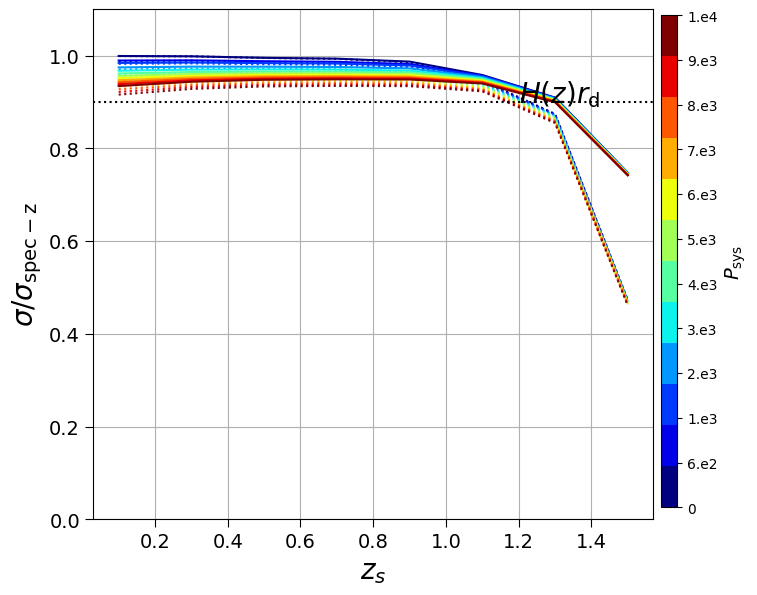

In [12]:
plt.clf()
# colormap
cmap = plt.get_cmap('jet', len(Pspeczsys_list))

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100, sharey=True)
plt.subplots_adjust(
    left=0.15,
    bottom=0.15,
    right=0.85,
    top=1.0,
    wspace=0.0,
    hspace=None,
)
for i, sigalpha_para_pre in enumerate(sigalpha_para_all_pre): 
    ax.plot(z_mid, sigalpha_para_pre[1]/sigalpha_para_pre[0], color=cmap(i))
    ax.plot(z_mid, sigalpha_para_pre[2]/sigalpha_para_pre[0], ls=':', color=cmap(i))


# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=1)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

## 4-tuple of floats *rect* = ``[left, bottom, width, height]``
cax = plt.axes([0.86, 0.17, 0.02, 0.82])

cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, 1, len(Pspeczsys_list)))
cbar.set_ticklabels([0]+Pspeczsys_list[1:])
cbar.set_label(label=r"$P_{\mathrm{sys}}$", fontsize=14)

ax.grid()
ax.axhline(y=0.9, ls=':', color='k')
ax.set_ylim([0., 1.1])
ax.set_xlabel(r"$z_s$", fontsize=20)
ax.text(1.2, 0.9, r"$H(z)r_{\mathrm{d}}$", fontsize=20)
ax.tick_params(axis='both', which='major', length=6, labelsize=14)
ax.tick_params(axis='both', which='minor', length=3, labelsize=12)
ax.set_ylabel(r"$\sigma/\sigma_{\mathrm{spec-z}}$", fontsize=20)

# ofile = odir + f"sigma_Hz_improvement_multitracer_diffPspeczsys_photozerr{sigma_photoz}.png"
# plt.savefig(ofile)

In [14]:
# save the sigalpha_perp_all_pre and sigalpha_perp_all_post
ofile = f"./output/sigalpha_perp_pre_recon_diffPspeczsys_photozerr{sigma_photoz}.npz"
np.savez(ofile, z_mid=z_mid, tracer_list=tracer_list, Pspeczsys_list=Pspeczsys_list, sigalpha_perp_all_pre=sigalpha_perp_all_pre)

# ofile = f"./output/sigalpha_perp_post_recon_diffPspeczsys_photozerr{sigma_photoz}.npz"
# np.savez(ofile, z_mid=z_mid, Pspeczsys_list=Pspeczsys_list, sigalpha_perp_all_post=sigalpha_perp_all_post)

## compare the difference of $\sigma (\alpha_{\perp})$ from different photo-z error

In [14]:
small_sigma_photoz = 0.025
ifile = f"./output/sigalpha_perp_pre_recon_diffPspeczsys_photozerr{small_sigma_photoz}.npz"
data = np.load(ifile)
data

In [15]:
data.files

['z_mid', 'Pspeczsys_list', 'sigalpha_perp_all_pre']

In [16]:
sigalpha_perp_all_pre_v2 = data['sigalpha_perp_all_pre']
#sigalpha_perp_all_pre_v2

In [17]:
ifile = f"./output/sigalpha_perp_post_recon_diffPspeczsys_photozerr{small_sigma_photoz}.npz"
data = np.load(ifile)
sigalpha_perp_all_post_v2 = data['sigalpha_perp_all_post']

<Figure size 432x288 with 0 Axes>

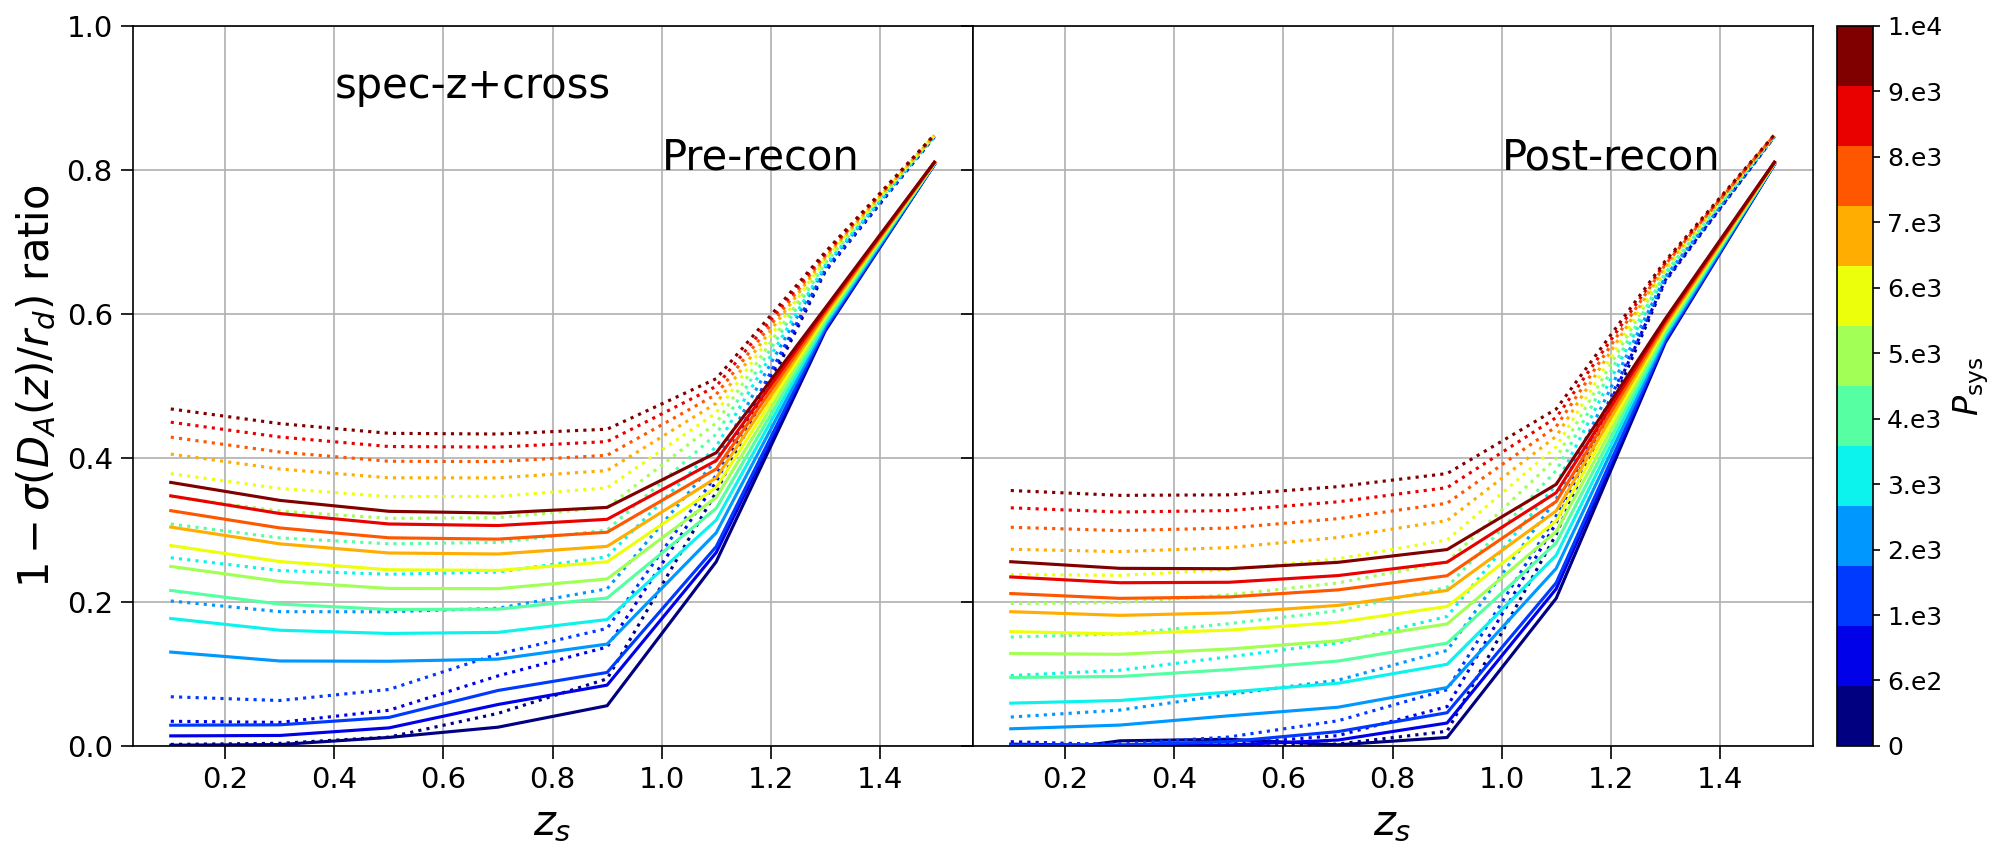

In [18]:
plt.clf()
# colormap
cmap = plt.get_cmap('jet', len(Pspeczsys_list))
i= 0
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=150, sharey=True)
plt.subplots_adjust(
    left=0.15,
    bottom=0.15,
    right=0.85,
    top=0.95,
    wspace=0.0,
    hspace=None,
)
for sigalpha_perp_pre, sigalpha_perp_pre_v2, sigalpha_perp_post, sigalpha_perp_post_v2 in zip(sigalpha_perp_all_pre, sigalpha_perp_all_pre_v2, sigalpha_perp_all_post, sigalpha_perp_all_post_v2): 
    axes[0].plot(z_mid, 1-sigalpha_perp_pre_v2[2]/sigalpha_perp_pre[1], ls=':', color=cmap(i))
    axes[1].plot(z_mid, 1-sigalpha_perp_post_v2[2]/sigalpha_perp_post[1], ls=':', color=cmap(i))
    
    axes[0].plot(z_mid, 1-sigalpha_perp_pre[2]/sigalpha_perp_pre[1], ls='-', color=cmap(i))
    axes[1].plot(z_mid, 1-sigalpha_perp_post[2]/sigalpha_perp_post[1], ls='-', color=cmap(i))
    i += 1

# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=1)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

## 4-tuple of floats *rect* = ``[left, bottom, width, height]``
cax = plt.axes([0.86, 0.15, 0.015, 0.80])

cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, 1, len(Pspeczsys_list)))
cbar.set_ticklabels([0]+Pspeczsys_list[1:], fontsize=12)
cbar.set_label(label=r"$P_{\mathrm{sys}}$", fontsize=16)

for i in range(2):
    axes[i].grid()
    axes[i].set_ylim([0.0, 1.0])
    axes[i].set_xlabel(r"$z_s$", fontsize=20)
    axes[i].text(1.0, 0.8, text_list[i], fontsize=20)
    axes[i].tick_params(axis='both', which='major', length=6, labelsize=14)
    axes[i].tick_params(axis='both', which='minor', length=3, labelsize=12)

axes[0].set_ylabel(r"$1-\sigma (D_A(z)/r_d)$ ratio", fontsize=20)
axes[0].text(0.4, 0.9, "spec-z+cross", fontsize=20)

filename = f"sigma_DA_specz_cross_photoz_diff_Pspeczsys_photozerr{sigma_photoz}.png"
ofile = odir + filename
plt.savefig(ofile)